# Data Preparing

In [57]:
import pandas as pd
data_raw = pd.read_csv('https://raw.githubusercontent.com/MiNicoB/Titanic/main/train.csv')

In [58]:
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
#NaN in df
a = data_raw.count()
b = data_raw.isna().sum()/len(data_raw)*100
pd.concat([a,b],axis=1).rename(columns={0:'count',1:'missing percentage'})


,count,missing percentage
PassengerId,891,0.000000
Survived,891,0.000000
Pclass,891,0.000000
Name,891,0.000000
Sex,891,0.000000
Age,714,19.865320
SibSp,891,0.000000
Parch,891,0.000000
Ticket,891,0.000000
Fare,891,0.000000


In [60]:
#removing Cabin as it has 77% NaN
data_raw = data_raw.drop(['Cabin'],axis=1)

In [61]:
data_raw['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [62]:
#there are only two missing Embarked, so filling with most common value
data_raw['Embarked'] = data_raw['Embarked'].fillna('S')
data_raw['Embarked'].isna().sum()

0

In [63]:
#age is still missing, but will try to impute missing values
#first encoding sex and pclass
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False, )
encoded_data = encoder.fit_transform(data_raw.loc[:,['Sex', 'Pclass','Embarked']],)
encoded_data_pandas = pd.DataFrame(encoded_data,
                                   columns = encoder.get_feature_names_out())

data = pd.concat([data_raw,encoded_data_pandas],axis = 1)

data


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [104]:
#imputing age
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

age_to_imp = data[['Survived','Age','Fare','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','SibSp']]

imputer = IterativeImputer(max_iter=10, random_state=0)

age_impt = pd.DataFrame(imputer.fit_transform(age_to_imp), columns=age_to_imp.columns)
age_impt

,Survived,Age,Fare,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,SibSp
0,0.0,22.000000,7.2500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,38.000000,71.2833,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,26.000000,7.9250,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,35.000000,53.1000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,35.000000,8.0500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.000000,13.0000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
887,1.0,19.000000,30.0000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0.0,24.833822,23.4500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
889,1.0,26.000000,30.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Training

In [65]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,  classification_report
import matplotlib.pyplot as plt

In [105]:
#select features
i_vars = age_impt[['Age','Fare','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','SibSp']]

# Creating an instance of decision tree
tree = DecisionTreeClassifier(max_depth = 4,
                              random_state = 0,
                              min_samples_leaf = 15,
                              criterion = 'gini')


# Training
tree.fit(i_vars,age_impt.Survived)

# Prediction
predictions = tree.predict(i_vars)

In [106]:
print(classification_report(age_impt.Survived, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       549
         1.0       0.78      0.81      0.80       342

    accuracy                           0.84       891
   macro avg       0.83      0.84      0.83       891
weighted avg       0.84      0.84      0.84       891



In [107]:
# Lets create confusion matrix
cm_data = pd.concat([
    pd.Series(age_impt.Survived, name = 'Actual'),
    pd.Series(predictions, name = 'Predicted')], axis = 1)
cm_data

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
886,0.0,0.0
887,1.0,1.0
888,0.0,0.0
889,1.0,1.0


In [108]:
pd.crosstab(cm_data['Actual'],cm_data['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,473,76
1.0,65,277


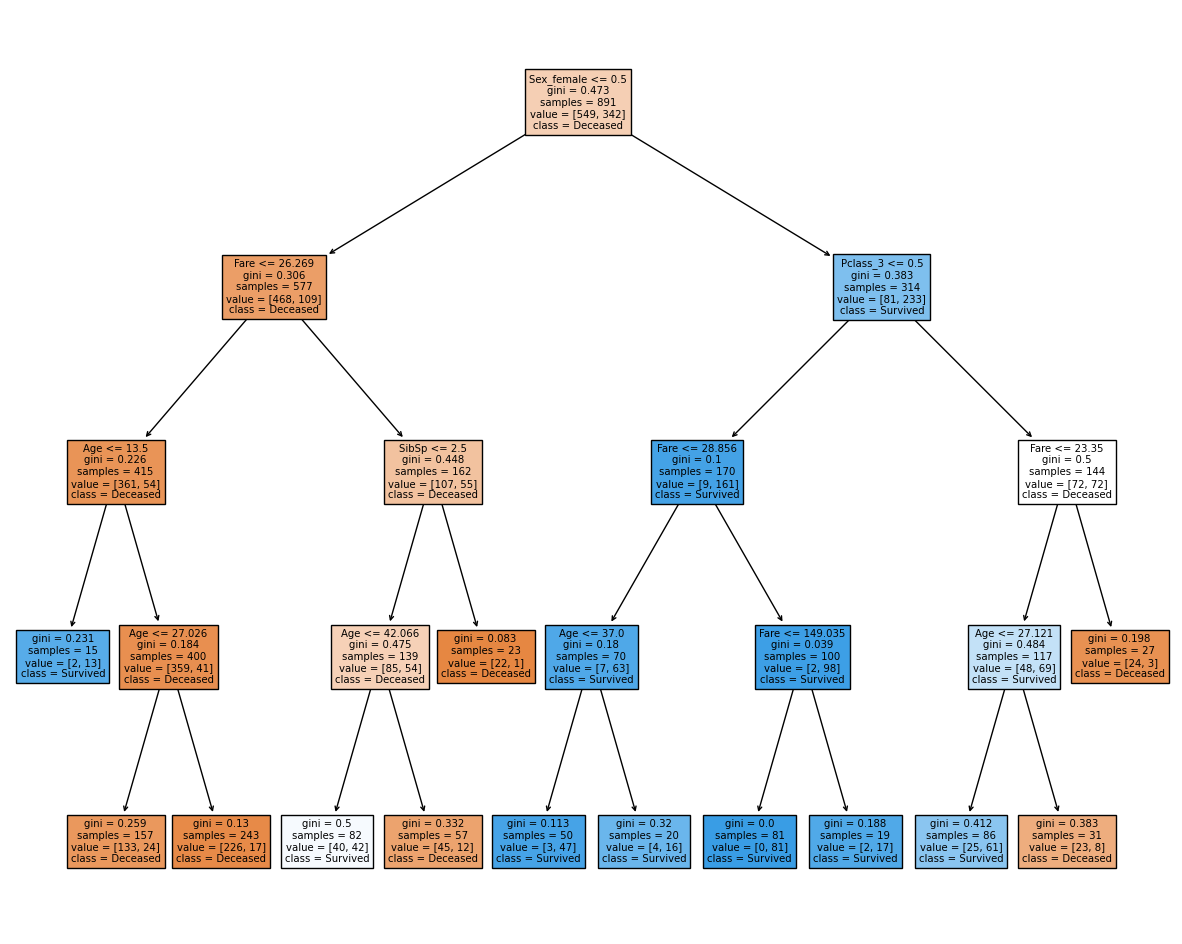

In [109]:
plt.subplots(figsize = (15,12))
plot_tree(tree,impurity =True,
          feature_names = tree.feature_names_in_,
          class_names = ['Deceased', 'Survived'],
          filled = True,
          fontsize=None)
plt.show()

# Test model

In [110]:
import pandas as pd
rd = pd.read_csv('https://raw.githubusercontent.com/MiNicoB/Titanic/main/test.csv')
a = rd.count()
b = rd.isna().sum()/len(rd)*100
pd.concat([a,b],axis=1).rename(columns={0:'count',1:'percetage of nan'})

,count,percetage of nan
PassengerId,418,0.000000
Pclass,418,0.000000
Name,418,0.000000
Sex,418,0.000000
Age,332,20.574163
SibSp,418,0.000000
Parch,418,0.000000
Ticket,418,0.000000
Fare,417,0.239234
Cabin,91,78.229665


In [111]:
#drop cabin
rd = rd.drop(['Cabin'],axis=1)

In [112]:
#encode data

encoder2 = OneHotEncoder(sparse = False)
encoded_data2 = encoder2.fit_transform(rd.loc[:,['Sex', 'Pclass','Embarked']],)
encoded_data_pandas2 = pd.DataFrame(encoded_data2,columns = encoder2.get_feature_names_out())

edata = pd.concat([rd,encoded_data_pandas2],axis = 1)

edata

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [113]:
#fill fare and Age with imputer

to_imp = edata[['Age','Fare','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','SibSp']]

imputer_2 = IterativeImputer(max_iter=10, random_state=0)

impt = pd.DataFrame(imputer.fit_transform(to_imp), columns=to_imp.columns)
impt


,Age,Fare,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,SibSp
0,34.500000,7.8292,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,47.000000,7.0000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,62.000000,9.6875,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,27.000000,8.6625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,22.000000,12.2875,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,25.523280,8.0500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
414,39.000000,108.9000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
415,38.500000,7.2500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
416,25.523280,8.0500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [114]:
#predict
predictions_prod = tree.predict(impt)

In [125]:
predictions_prod = pd.DataFrame(predictions_prod,columns=['Survived'])

In [124]:
pd.concat([edata['PassengerId'],predictions_prod],axis=1).to_csv('result.csv',index=False)